<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/05.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/%ED%95%B4%EC%84%A4/ch05_08_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_SoftmaxRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.08. 기초모델 구현 - Softmax Regression
---
* 날짜:
* 이름:

## 학습내용
    - 소프트맥스 회귀 프로세스를 이해한다.
    - 소프트맥스 함수를 구현한다.

```
import numpy as np
import matplotlib.pyplot as plt
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
PATH = '/content/drive/MyDrive/[ Work ] NCS/[훈련과정] 딥러닝 프레임워크 실무/과정02.데이터분석/05.머신러닝기반데이터분석'
sys.path.append(PATH)
from data_loader import *

### **데이터 로드**

In [ ]:
X_train, X_test, y_train, y_test = iris_loader(3)

(150, 4) (150,) [5.1 3.5 1.4 0.2] 0
(112, 4) (38, 4) (112, 3) (38, 3)


## 클래스 작성
---

### 소프트맥스함수 구현

In [ ]:
def softmax(z):
  return np.exp(z) / np.sum( np.exp(z) , axis=1).reshape(-1,1)

In [ ]:
Z = np.array([1,1,1,1,0,2]).reshape(2,3)
print('input Z: ', Z.shape)
print('1st 항:', np.exp(Z).shape) 
print('2nd 항:', np.sum( np.exp(X_train) , axis=1).reshape(-1,1).shape)
print('softmax(Z):', softmax(Z), softmax(Z).shape)

input Z:  (2, 3)
1st 항: (2, 3)
2nd 항: (112, 1)
softmax(Z): [[0.33333333 0.33333333 0.33333333]
 [0.24472847 0.09003057 0.66524096]] (2, 3)


### 전체 클래스 구현

In [ ]:
class SoftmaxRegressionGD():

  def __init__(self, lr=0.01, random_state=1):
    self.lr=lr
    self.seed = np.random.RandomState(random_state)
  
  def init_weights(self, X, y):
    self.w = self.seed.normal(loc=0.0, scale = 0.01, size=(X.shape[1], y.shape[1]))
    self.b = self.seed.normal(loc=0.0, scale = 0.01)
    print(f'[info] Initial weights w : {self.w.shape}', self.w, sep='\n')
    print(f'[info] Initial weights b : {self.b}')
 
  def softmax(self, z):
    return np.exp(z) / np.sum( np.exp(z), axis=1).reshape(-1,1)

  def model(self, X):
    z = np.dot(X, self.w) + self.b
    y_hat = self.softmax(z)
    return z, y_hat

  def predict(self, X):
    _, y_hat = self.model(X)
    y_logit = np.argmax(y_hat, axis=1) 
    return y_logit

  def loss(self, y, y_hat):
    return -np.log(y_hat[np.arange(y_hat.shape[0]), np.argmax(y_hat, axis=1)]).sum() / y.shape[0]
  
  def accuracy(self, y, y_logit):
    return np.count_nonzero(np.argmax(y,axis=1)==y_logit)/y.shape[0]
  
  def evaluate(self, X, y):
    _, y_hat = self.model(X)
    loss = self.loss(y, y_hat)
    
    y_logit = self.predict(X)
    acc = self.accuracy(y, y_logit)
    return loss, acc

  def grad(self, X, y):
    _, y_hat = self.model(X)
    y_hat[np.arange(len(y_hat)), np.argmax(y, axis=1)] -=1
    grad_w = np.dot(X.T, y_hat) / X.shape[0]
    grad_b = np.sum(y_hat) / X.shape[0]
    return grad_w, grad_b

  def fit(self, X, y, epochs=10, show_params=False):

    self.init_weights(X, y) # 가중치 초기화
    self.history=dict(loss=[], acc=[])
    for epoch in range(epochs):

      # 최적화
      grad_w, grad_b = self.grad(X, y)
      self.w += - self.lr * grad_w
      self.b += - self.lr * grad_b
      
      # 평가
      loss, acc = self.evaluate(X, y)
      self.history['loss'].append(loss)
      self.history['acc'].append(acc)
      print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
      if show_params: print(self.w) 

  def draw_dflow(self, X, y, title='', figsize=(8,4)):
    _, y_hat = self.model(X)
    y_logit = self.predict(X)

    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(np.argmax(y, axis=1), label='y', marker='.', linestyle='--')
    #plt.hist(y_hat)
    plt.plot(y_logit, label='$\logit$', marker='o', linestyle='')
    plt.legend()
    plt.show()

  def draw_lcurve(self, title='', figsize=(8,4), marker='o'):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(self.history['acc'], label='acc', marker=marker)
    plt.plot(self.history['loss'], label='loss', marker=marker)    
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

## iris 데이터로 분류 진행
---

### **학습전 성능 평가**

[info] Initial weights w : (4, 3)
[[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]
 [ 0.01744812 -0.00761207  0.00319039]
 [-0.0024937   0.01462108 -0.02060141]]
[info] Initial weights b : -0.003224172040135075


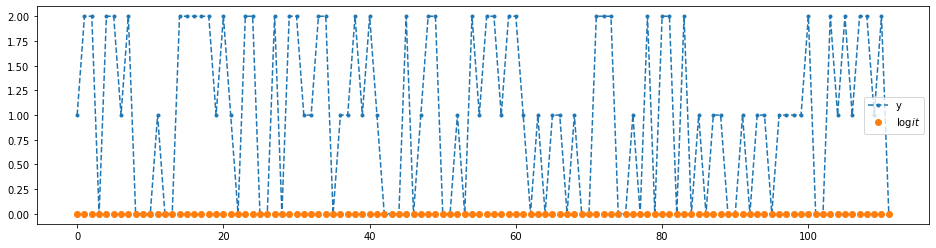

성능:  (0.975551748947377, 0.33035714285714285)


In [ ]:
model = SoftmaxRegressionGD(0.1)

model.init_weights(X_train, y_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **학습**

In [ ]:
model.fit(X_train, y_train, epochs=200)

[info] Initial weights w : (4, 3)
[[-0.00384054  0.01133769 -0.01099891]
 [-0.00172428 -0.00877858  0.00042214]
 [ 0.00582815 -0.01100619  0.01144724]
 [ 0.00901591  0.00502494  0.00900856]]
[info] Initial weights b : -0.006837278591743331
[Epoch 0] loss: 0.61  acc: 0.37
[Epoch 1] loss: 0.89  acc: 0.63
[Epoch 2] loss: 0.56  acc: 0.37
[Epoch 3] loss: 0.73  acc: 0.63
[Epoch 4] loss: 0.49  acc: 0.64
[Epoch 5] loss: 0.63  acc: 0.63
[Epoch 6] loss: 0.41  acc: 0.7
[Epoch 7] loss: 0.58  acc: 0.63
[Epoch 8] loss: 0.36  acc: 0.7
[Epoch 9] loss: 0.55  acc: 0.63
[Epoch 10] loss: 0.33  acc: 0.7
[Epoch 11] loss: 0.52  acc: 0.63
[Epoch 12] loss: 0.3  acc: 0.7
[Epoch 13] loss: 0.51  acc: 0.63
[Epoch 14] loss: 0.28  acc: 0.7
[Epoch 15] loss: 0.49  acc: 0.63
[Epoch 16] loss: 0.27  acc: 0.7
[Epoch 17] loss: 0.48  acc: 0.63
[Epoch 18] loss: 0.25  acc: 0.7
[Epoch 19] loss: 0.47  acc: 0.63
[Epoch 20] loss: 0.24  acc: 0.7
[Epoch 21] loss: 0.46  acc: 0.63
[Epoch 22] loss: 0.23  acc: 0.7
[Epoch 23] loss: 0.45

### **학습 후 성능평가**

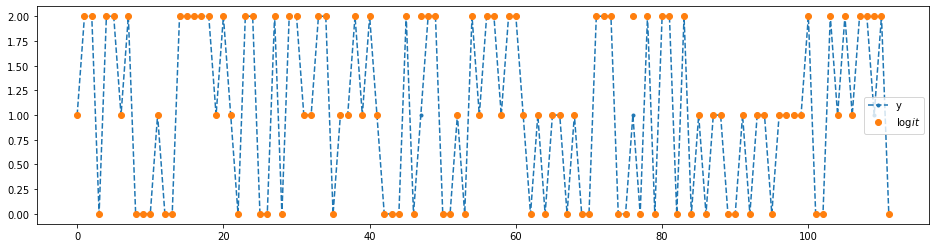

성능:  (0.241914341127754, 0.9732142857142857)


In [ ]:
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **테스트셋 성능평가**

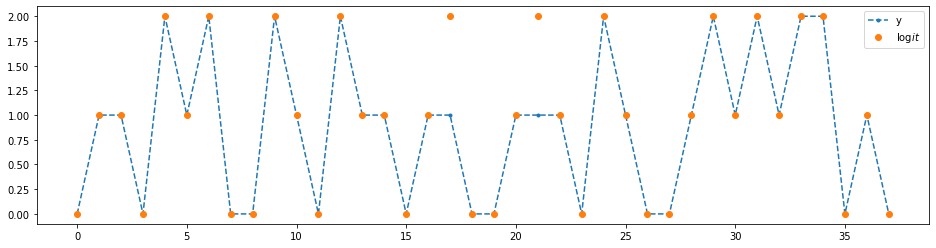

성능:  (0.2949490865858477, 0.9473684210526315)


In [ ]:
model.draw_dflow(X_test, y_test, figsize=(16,4))
print('성능: ', model.evaluate(X_test, y_test))

### **학습곡선**

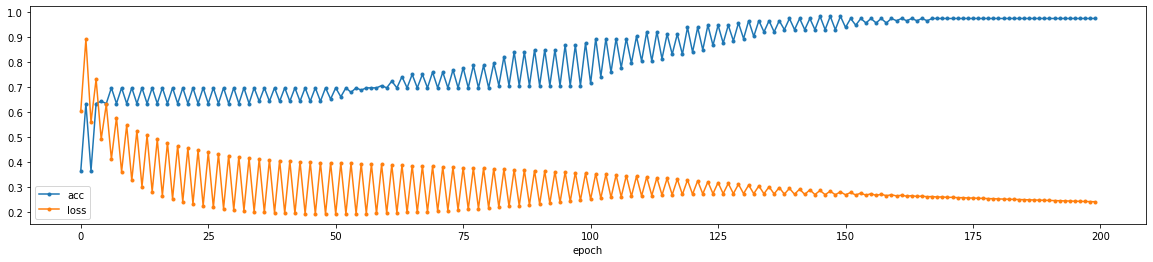

In [ ]:
model.draw_lcurve(figsize=(20,4), marker='.')

### **하이퍼파라미터에 따른 성능평가**

In [ ]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
  model = SoftmaxRegressionGD(lr=lr)
  history = model.fit(X_train, y_train, epochs=200)
  print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[info] Initial weights w : (4, 3)
[[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]
 [ 0.01744812 -0.00761207  0.00319039]
 [-0.0024937   0.01462108 -0.02060141]]
[info] Initial weights b : -0.003224172040135075
[Epoch 0] loss: 0.98  acc: 0.33
[Epoch 1] loss: 0.98  acc: 0.33
[Epoch 2] loss: 0.98  acc: 0.33
[Epoch 3] loss: 0.98  acc: 0.33
[Epoch 4] loss: 0.98  acc: 0.33
[Epoch 5] loss: 0.98  acc: 0.33
[Epoch 6] loss: 0.98  acc: 0.33
[Epoch 7] loss: 0.98  acc: 0.33
[Epoch 8] loss: 0.98  acc: 0.33
[Epoch 9] loss: 0.98  acc: 0.33
[Epoch 10] loss: 0.98  acc: 0.33
[Epoch 11] loss: 0.98  acc: 0.33
[Epoch 12] loss: 0.98  acc: 0.33
[Epoch 13] loss: 0.98  acc: 0.33
[Epoch 14] loss: 0.98  acc: 0.33
[Epoch 15] loss: 0.98  acc: 0.33
[Epoch 16] loss: 0.98  acc: 0.33
[Epoch 17] loss: 0.98  acc: 0.33
[Epoch 18] loss: 0.98  acc: 0.33
[Epoch 19] loss: 0.98  acc: 0.33
[Epoch 20] loss: 0.98  acc: 0.33
[Epoch 21] loss: 0.98  acc: 0.33
[Epoch 22] loss: 0.98  acc: 0.33
[Epoch 23] 